In [1]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
import tqdm

import multiprocessing as mp
from multiprocessing import Process
from multiprocessing import Pool

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

radius = 1/3600 * u.arcsec

In [2]:
def find_targets(catalog):
    lcenter = 0
    bcenter = 0
    ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
    sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0, [266.4049882865447, -28.936177761791473] l=0, b=0
    width = 0.4
    print(sky_org, width)

    Vizier.TIMEOUT = 1800
    Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"
    database = Vizier(columns=['*', 'GLON', 'GLAT', '_RAJ2000', '_DEJ2000', '_Glon', '_Glat'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='fk5'), width=width*u.degree, catalog=catalog)

    table_pd = database[catalog].to_pandas()
    print(len(table_pd))
    table_pd.head()

    return table_pd

In [3]:
def limit_region(pd):
    lcenter = 0
    bcenter = 0
    ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
    sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0, [266.4049882865447, -28.936177761791473] l=0, b=0
    width = 0.4
    print(sky_org, width)

    min_ra = sky_org[0] - width/2
    max_ra = sky_org[0] + width/2
    min_dec = sky_org[1] - width/2
    max_dec = sky_org[1] + width/2
    pd_jsky = pd.query( '@min_ra <= RAJ2000 <= @max_ra and @min_dec <= DEJ2000 <= @max_dec')

    return pd_jsky

## GAIA EDR3

In [4]:
catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
pd_gaiaedr3 = find_targets(catalog)
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3["_Glon"] = np.where(pd_gaiaedr3["_Glon"]>180, pd_gaiaedr3["_Glon"]-360, pd_gaiaedr3["_Glon"])

pd_gaiaedr3_jsky=limit_region(pd_gaiaedr3)
pd_gaiaedr3_jsky = pd_gaiaedr3_jsky.rename(columns={'index': 'index_GAIA', '_RAJ2000': '_RAJ2000_GAIA', '_DEJ2000': '_DEJ2000_GAIA', '_Glon': '_Glon_GAIA', '_Glat': '_Glat_GAIA', 'RAJ2000': 'RAJ2000_GAIA', 'DEJ2000': 'DEJ2000_GAIA', 'GLON': 'GLON_GAIA', 'GLAT': 'GLAT_GAIA'})
print(len(pd_gaiaedr3_jsky))
pd_gaiaedr3_jsky.to_csv("gaiaedr3_v3.csv")
pd_gaiaedr3_jsky.head()

[266.4049882865447, -28.936177761791473] 0.4


<ipython-input-4-bd0681695df8>:2: TableReplaceWarning: converted column 'PS1' from integer to float
  pd_gaiaedr3 = find_targets(catalog)
<ipython-input-4-bd0681695df8>:2: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  pd_gaiaedr3 = find_targets(catalog)
<ipython-input-4-bd0681695df8>:2: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  pd_gaiaedr3 = find_targets(catalog)
<ipython-input-4-bd0681695df8>:2: TableReplaceWarning: converted column 'URAT1' from integer to float
  pd_gaiaedr3 = find_targets(catalog)


14406
[266.4049882865447, -28.936177761791473] 0.4
12490


,_RAJ2000_GAIA,_DEJ2000_GAIA,_Glon_GAIA,_Glat_GAIA,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000_GAIA,DEJ2000_GAIA,GLON_GAIA,GLAT_GAIA
0,266.296806,-29.135035,-0.219013,-0.022975,266.296806,14.8761,-29.135035,9.7728,4057104070060689280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.003998,1.11960,20.943241,0.015631,141.800003,84.369003,19.959318,0.645981,170.199997,11.4080,19.170520,0.072876,0.788797,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.943241,0.015631,79.003998,266.296806,-29.135035,-0.219010,-0.022975
1,266.294476,-29.135177,-0.220195,-0.021313,266.294476,2.3699,-29.135177,1.7434,4057104074345828736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.040001,0.87496,20.644325,0.009537,32.414001,6.943900,21.561722,0.232612,127.269997,6.4187,19.486113,0.054890,2.075609,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.644325,0.009537,104.040001,266.294476,-29.135177,-0.220193,-0.021313
2,266.295908,-29.134095,-0.218632,-0.021823,266.295908,0.0418,-29.134110,0.0336,4057104074348007808,0.4910,0.0459,3.394,-0.052,0.050,-3.394,0.032,1.149,11382.000000,4.03720,15.546850,0.002782,3901.100098,17.056000,16.360567,0.005506,10947.000000,14.5220,14.649655,0.004045,1.710912,NaN,NaN,NaN,NaN,7.303266e+16,NaN,164532442.0,NaN,15.546850,0.002782,11382.000000,266.295908,-29.134095,-0.218630,-0.021824
3,266.275461,-29.133311,-0.227271,-0.006170,266.275460,0.3111,-29.133310,0.2450,4057104104409847040,0.4692,0.3106,0.260,-0.150,0.376,0.213,0.232,1.036,518.119995,1.10150,18.901281,0.003594,49.337002,9.537200,21.105600,0.209896,970.989990,9.6315,17.279858,0.011414,3.825743,NaN,NaN,NaN,NaN,7.304266e+16,NaN,164532424.0,NaN,18.875690,0.003560,530.479980,266.275461,-29.133311,-0.227269,-0.006171
4,266.273611,-29.133917,-0.228632,-0.005109,266.273611,1.9220,-29.133917,2.2113,4057104108705564288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.379997,0.76817,20.651226,0.008525,27.243000,3.652300,21.750422,0.145586,154.639999,13.7250,19.274565,0.096438,2.475857,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.651226,0.008525,103.379997,266.273611,-29.133917,-0.228630,-0.005109


In [5]:
pd_allcatalog1 = pd_gaiaedr3_jsky.copy()
pd_allcatalog1["_RAJ2000_basic"] = pd_allcatalog1["_RAJ2000_GAIA"]
pd_allcatalog1["_DEJ2000_basic"] = pd_allcatalog1["_DEJ2000_GAIA"]

## 2MASS

In [6]:
catalog = "II/246/out" # 2MASS All-Sky Catalog of Point Sources (Cutri+ 2003) II/246/out
pd_2mass = find_targets(catalog)
pd_2mass["GLON"] = np.where(pd_2mass["GLON"]>180, pd_2mass["GLON"]-360, pd_2mass["GLON"])
pd_2mass["_Glon"] = np.where(pd_2mass["_Glon"]>180, pd_2mass["_Glon"]-360, pd_2mass["_Glon"])
pd_2mass_jsky=limit_region(pd_2mass)
pd_2mass_jsky = pd_2mass_jsky.rename(columns={'index': 'index_2MASS', '_RAJ2000': '_RAJ2000_2MASS', '_DEJ2000': '_DEJ2000_2MASS', '_Glon': '_Glon_2MASS', '_Glat': '_Glat_2MASS', 'RAJ2000': 'RAJ2000_2MASS', 'DEJ2000': 'DEJ2000_2MASS', 'GLON': 'GLON_2MASS', 'GLAT': 'GLAT_2MASS'})
print(len(pd_2mass_jsky))
pd_2mass_jsky.to_csv("twomass_v3.csv")
pd_2mass_jsky.head()

[266.4049882865447, -28.936177761791473] 0.4
30930
[266.4049882865447, -28.936177761791473] 0.4
27372


,_RAJ2000_2MASS,_DEJ2000_2MASS,_Glon_2MASS,_Glat_2MASS,RAJ2000_2MASS,DEJ2000_2MASS,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON_2MASS,GLAT_2MASS
20,266.231684,-29.135473,-0.249081,0.025312,266.231684,-29.135473,b'17445560-2908077',17.503,NaN,12.350,0.035,10.156,0.039,b'UAA',b'022',b'011',b'000',0,0,-0.249,0.025
21,266.231596,-29.126745,-0.241678,0.029936,266.231596,-29.126745,b'17445558-2907362',13.881,NaN,10.945,0.053,9.613,0.072,b'UAA',b'622',b'012',b'00c',0,0,-0.242,0.030
22,266.231680,-29.133825,-0.247678,0.026176,266.231680,-29.133825,b'17445560-2908017',17.413,NaN,13.131,NaN,12.605,0.083,b'UUA',b'002',b'001',b'00c',0,0,-0.248,0.026
23,266.232132,-29.129711,-0.243963,0.027988,266.232132,-29.129711,b'17445571-2907469',15.098,0.042,13.914,NaN,12.377,NaN,b'CUU',b'200',b'100',b'000',0,0,-0.244,0.028
24,266.231271,-29.125114,-0.240436,0.031030,266.231271,-29.125114,b'17445550-2907304',16.237,NaN,13.455,NaN,12.506,0.033,b'UUA',b'002',b'001',b'00c',0,0,-0.240,0.031


## Xmatch GAIA EDR3 x 2MASS and make allcatalog2

In [7]:
pd_2mass_jsky_c = pd_2mass_jsky.copy()

In [8]:
def pd_query_gaiaedr3_2mass(ra, dec, i):
    pd_2mass_jsky_c["d_RA_gaiaedr3_2mass"] = pd_2mass_jsky_c["_RAJ2000_2MASS"] - ra
    pd_2mass_jsky_c["d_Dec_gaiaedr3_2mass"] = pd_2mass_jsky_c["_DEJ2000_2MASS"] - dec
    pd_2mass_jsky_c["d_gaiaedr3_2mass"] = np.sqrt( pd_2mass_jsky_c["d_RA_gaiaedr3_2mass"] * pd_2mass_jsky_c["d_RA_gaiaedr3_2mass"] + pd_2mass_jsky_c["d_Dec_gaiaedr3_2mass"] * pd_2mass_jsky_c["d_Dec_gaiaedr3_2mass"])
    pd_qy_c = pd_2mass_jsky_c.query( 'd_gaiaedr3_2mass <= @radius.value' )

    if pd_qy_c.empty == False : 
        pd_qy_c = pd_qy_c.reset_index()
        pd_qy_c["n_gaiaedr3_2mass"] = len(pd_qy_c)
        pd_qy_c["Hw_2MASS"] = pd_qy_c["Hmag"] + 0.75 * (pd_qy_c["Jmag"]-pd_qy_c["Hmag"]) - 0.027 * (pd_qy_c["Jmag"]-pd_qy_c["Hmag"]) * (pd_qy_c["Jmag"]-pd_qy_c["Hmag"])
        if len(pd_qy_c) >=2 : 
            pd_qy_c = pd_qy_c.sort_values('d_gaiaedr3_2mass')
            pd_qy_c = pd_qy_c.reset_index()

        pd_qy_c1 = pd.DataFrame( [pd_allcatalog1.loc[i]] )
        for j in range(len(pd_qy_c)-1): pd_qy_c1 = pd_qy_c1.append( [pd_allcatalog1.loc[i]] )
        pd_qy_c1 = pd_qy_c1.reset_index()
        pd_qy_c1 = pd_qy_c1.join(pd_qy_c, rsuffix="_2MASS", lsuffix="_GAIA")
    else : 
        pd_qy_c = pd_qy_c.reset_index()
        
        pd_qy_c1 = pd.DataFrame( [pd_allcatalog1.loc[i]] )
        pd_qy_c1 = pd_qy_c1.reset_index()

        pd_qy_c1 = pd_qy_c1.join(pd_qy_c, rsuffix="_2MASS", lsuffix="_GAIA")
        pd_qy_c1["n_gaiaedr3_2mass"] = 0

    return pd_qy_c1

In [9]:
args = list(zip(pd_allcatalog1[ "_RAJ2000_basic" ].values, pd_allcatalog1[ "_DEJ2000_basic" ].values, pd_allcatalog1.index))
p = Pool(mp.cpu_count())
result = p.starmap(pd_query_gaiaedr3_2mass, tqdm.tqdm(args, total=len(args)) )

100%|██████████| 12490/12490 [00:09<00:00, 1326.63it/s]


In [10]:
pd_allcatalog2 = pd.concat(result[:])
print(type(pd_allcatalog2))
print(len(pd_allcatalog2))
pd_allcatalog2 = pd_allcatalog2.reset_index(drop=True)
pd_allcatalog2.to_csv("xmatch_gaiaedr3_2MASS_v3.csv")
pd_allcatalog2.tail()

<class 'pandas.core.frame.DataFrame'>
12627


,index_GAIA,_RAJ2000_GAIA,_DEJ2000_GAIA,_Glon_GAIA,_Glat_GAIA,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000_GAIA,DEJ2000_GAIA,GLON_GAIA,GLAT_GAIA,_RAJ2000_basic,_DEJ2000_basic,index_2MASS,_RAJ2000_2MASS,_DEJ2000_2MASS,_Glon_2MASS,_Glat_2MASS,RAJ2000_2MASS,DEJ2000_2MASS,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON_2MASS,GLAT_2MASS,d_RA_gaiaedr3_2mass,d_Dec_gaiaedr3_2mass,d_gaiaedr3_2mass,n_gaiaedr3_2mass,Hw_2MASS,level_0
12622,14401,266.259976,-28.740782,0.100447,0.210309,266.259957,0.7018,-28.740781,0.5462,4.057542e+18,0.2755,0.6345,3.722,-3.719,0.735,0.147,0.485,0.901,174.419998,0.75276,20.083382,0.005436,54.620998,10.246000,20.995136,0.203678,213.589996,8.9891,18.923962,0.045851,2.071175,NaN,NaN,NaN,NaN,7.351266e+16,NaN,164548044.0,NaN,20.073331,0.005399,176.039993,266.259976,-28.740782,0.100450,0.210309,266.259976,-28.740782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12623,14402,266.254156,-28.743802,0.095181,0.213085,266.254121,1.1961,-28.743824,0.9806,4.057542e+18,1.1259,0.7238,8.541,-6.916,1.286,-5.012,0.860,1.058,161.380005,0.70006,20.167719,0.005457,33.516998,3.617100,21.525370,0.117202,216.190002,8.7245,18.910826,0.043979,2.614544,NaN,NaN,NaN,NaN,7.350266e+16,NaN,164547970.0,NaN,20.148094,0.005384,164.330002,266.254156,-28.743802,0.095183,0.213084,266.254156,-28.743802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12624,14403,266.257370,-28.738209,0.101447,0.213580,266.257370,0.0213,-28.738221,0.0162,4.057542e+18,0.7610,0.0249,2.763,0.017,0.026,-2.763,0.016,1.028,27286.000000,5.34240,14.597526,0.002764,12401.000000,13.526000,15.104913,0.003031,21496.000000,14.2830,13.917003,0.003848,1.187910,NaN,NaN,NaN,NaN,7.351266e+16,NaN,164548052.0,NaN,14.597526,0.002764,27286.000000,266.257370,-28.738209,0.101449,0.213580,266.257370,-28.738209,30040.0,266.257373,-28.738255,0.101420,0.213561,266.257373,-28.738255,b'17450176-2844177',13.055,0.036,12.572,0.056,11.115,NaN,b'AAU',b'220',b'110',b'000',0.0,0.0,0.101,0.214,0.000003,-0.000046,0.000046,1,12.927951,NaN
12625,14404,266.257230,-28.742736,0.097532,0.211328,266.257230,21.4004,-28.742736,14.2429,4.057542e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.983002,1.97990,21.014540,0.029186,26.629000,11.475000,21.775171,0.467867,104.959999,13.5770,19.695326,0.140491,2.079845,NaN,NaN,NaN,NaN,7.350266e+16,NaN,NaN,NaN,21.014540,0.029186,73.983002,266.257230,-28.742736,0.097535,0.211328,266.257230,-28.742736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12626,14405,266.254639,-28.742269,0.096745,0.213509,266.254639,37.9178,-28.742269,21.1011,4.057542e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.351997,1.66530,21.100494,0.026596,41.705002,47.054001,21.288073,1.225004,146.990005,21.1910,19.329681,0.156571,1.958391,NaN,NaN,NaN,NaN,7.350266e+16,NaN,NaN,NaN,21.100494,0.026596,68.351997,266.254639,-28.742269,0.096747,0.213509,266.254639,-28.742269,30116.0,266.254656,-28.742315,0.096713,0.213473,266.254656,-28.742315,b'17450111-2844323',14.746,0.037,12.800,0.027,12.080,0.028,b'BAE',b'222',b'111',b'000',0.0,0.0,0.097,0.214,0.000017,-0.000046,0.000049,1,14.157254,NaN


## Xmatch 2mass GAIA EDR3 and make allcatalog3

In [11]:
pd_allcatalog2_c = pd_allcatalog2.copy()

In [12]:
def pd_query_2mass_gaiaedr3(ra, dec, i):
    pd_allcatalog2_c["d_RA_2mass_gaiaedr3"] = pd_allcatalog2_c["_RAJ2000_basic"] - ra
    pd_allcatalog2_c["d_Dec_2mass_gaiaedr3"] = pd_allcatalog2_c["_DEJ2000_basic"] - dec

    pd_allcatalog2_c["d_2mass_gaiaedr3"] = np.sqrt( pd_allcatalog2_c["d_RA_2mass_gaiaedr3"] * pd_allcatalog2_c["d_RA_2mass_gaiaedr3"] + pd_allcatalog2_c["d_Dec_2mass_gaiaedr3"] * pd_allcatalog2_c["d_Dec_2mass_gaiaedr3"])
    pd_qy_c = pd_allcatalog2_c.query( 'd_2mass_gaiaedr3 <= @radius.value' )

    if pd_qy_c.empty == False : 
        pd_qy_c = pd_qy_c.reset_index()
        pd_allcatalog2.loc[pd_qy_c["index"][0],"n_2mass_gaiaedr3"] = len(pd_qy_c)
        for j in range(len(pd_qy_c)-1): pd_allcatalog2.loc[pd_qy_c["index"][0],"n_2mass_gaiaedr3"] = len(pd_qy_c)
    else : 
        pd_qy_c1 = pd.DataFrame( [pd_2mass_jsky.loc[i]] )
        pd_qy_c1 = pd_qy_c1.reset_index()
        pd_qy_c1["Hw_2MASS"] = pd_qy_c1["Hmag"] + 0.75 * (pd_qy_c1["Jmag"]-pd_qy_c1["Hmag"]) - 0.027 * (pd_qy_c1["Jmag"]-pd_qy_c1["Hmag"]) * (pd_qy_c1["Jmag"]-pd_qy_c1["Hmag"])
        pd_qy_c1["n_2mass_gaiaedr3"] = len(pd_qy_c)
        pd_qy_c1 = pd_qy_c1.rename(columns={'index': 'index_2MASS', '_RAJ2000': '_RAJ2000_2MASS', '_DEJ2000': '_DEJ2000_2MASS', '_Glon': '_Glon_2MASS', '_Glat': '_Glat_2MASS', 'RAJ2000': 'RAJ2000_2MASS', 'DEJ2000': 'DEJ2000_2MASS', 'GLON': 'GLON_2MASS', 'GLAT': 'GLAT_2MASS'})
        pd_qy_c1["_RAJ2000_basic"] = pd_qy_c1["_RAJ2000_2MASS"]
        pd_qy_c1["_DEJ2000_basic"] = pd_qy_c1["_DEJ2000_2MASS"]
        return pd_qy_c1

In [13]:
args = list(zip(pd_2mass_jsky[ "_RAJ2000_2MASS" ].values, pd_2mass_jsky[ "_DEJ2000_2MASS" ].values, pd_2mass_jsky.index))
p = Pool(mp.cpu_count())
result = p.starmap(pd_query_2mass_gaiaedr3, tqdm.tqdm(args, total=len(args)) )

100%|██████████| 27372/27372 [00:20<00:00, 1354.11it/s]


In [14]:
pd_allcatalog3 = pd_allcatalog2.append(result[:])
print(type(pd_allcatalog3))
print(len(pd_allcatalog3))
pd_allcatalog3 = pd_allcatalog3.reset_index(drop=True)
pd_allcatalog3.to_csv("xmatch_or_gaiaedr3_2MASS_v3.csv")
pd_allcatalog3.tail()

<class 'pandas.core.frame.DataFrame'>
33910


,index_GAIA,_RAJ2000_GAIA,_DEJ2000_GAIA,_Glon_GAIA,_Glat_GAIA,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000_GAIA,DEJ2000_GAIA,GLON_GAIA,GLAT_GAIA,_RAJ2000_basic,_DEJ2000_basic,index_2MASS,_RAJ2000_2MASS,_DEJ2000_2MASS,_Glon_2MASS,_Glat_2MASS,RAJ2000_2MASS,DEJ2000_2MASS,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON_2MASS,GLAT_2MASS,d_RA_gaiaedr3_2mass,d_Dec_gaiaedr3_2mass,d_gaiaedr3_2mass,n_gaiaedr3_2mass,Hw_2MASS,level_0,n_2mass_gaiaedr3
33905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.583883,-28.747820,30905.0,266.583883,-28.747820,0.242382,-0.035792,266.583883,-28.747820,b'17462013-2844521',15.497,0.065,11.738,0.021,9.972,0.019,b'DAA',b'222',b'111',b'p00',0.0,0.0,0.242,-0.036,NaN,NaN,NaN,NaN,14.175738,NaN,0.0
33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.582893,-28.737677,30908.0,266.582893,-28.737677,0.250596,-0.029779,266.582893,-28.737677,b'17461989-2844156',15.011,NaN,13.088,NaN,11.767,0.037,b'UUA',b'062',b'002',b'00c',0.0,0.0,0.251,-0.030,NaN,NaN,NaN,NaN,14.430406,NaN,0.0
33907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.583247,-28.743725,30909.0,266.583247,-28.743725,0.245591,-0.033187,266.583247,-28.743725,b'17461997-2844374',15.569,NaN,13.509,NaN,12.423,0.044,b'UUA',b'002',b'001',b'00c',0.0,0.0,0.246,-0.033,NaN,NaN,NaN,NaN,14.939423,NaN,0.0
33908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.583561,-28.738548,30911.0,266.583561,-28.738548,0.250157,-0.030732,266.583561,-28.738548,b'17462005-2844187',15.417,NaN,12.559,NaN,11.444,0.065,b'UUA',b'062',b'002',b'00c',0.0,0.0,0.250,-0.031,NaN,NaN,NaN,NaN,14.481959,NaN,0.0
33909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.583529,-28.741314,30913.0,266.583529,-28.741314,0.247779,-0.032145,266.583529,-28.741314,b'17462004-2844287',15.492,NaN,13.424,0.132,10.521,0.065,b'UBA',b'022',b'012',b'0cc',0.0,0.0,0.248,-0.032,NaN,NaN,NaN,NaN,14.859531,NaN,0.0


## Plot stars

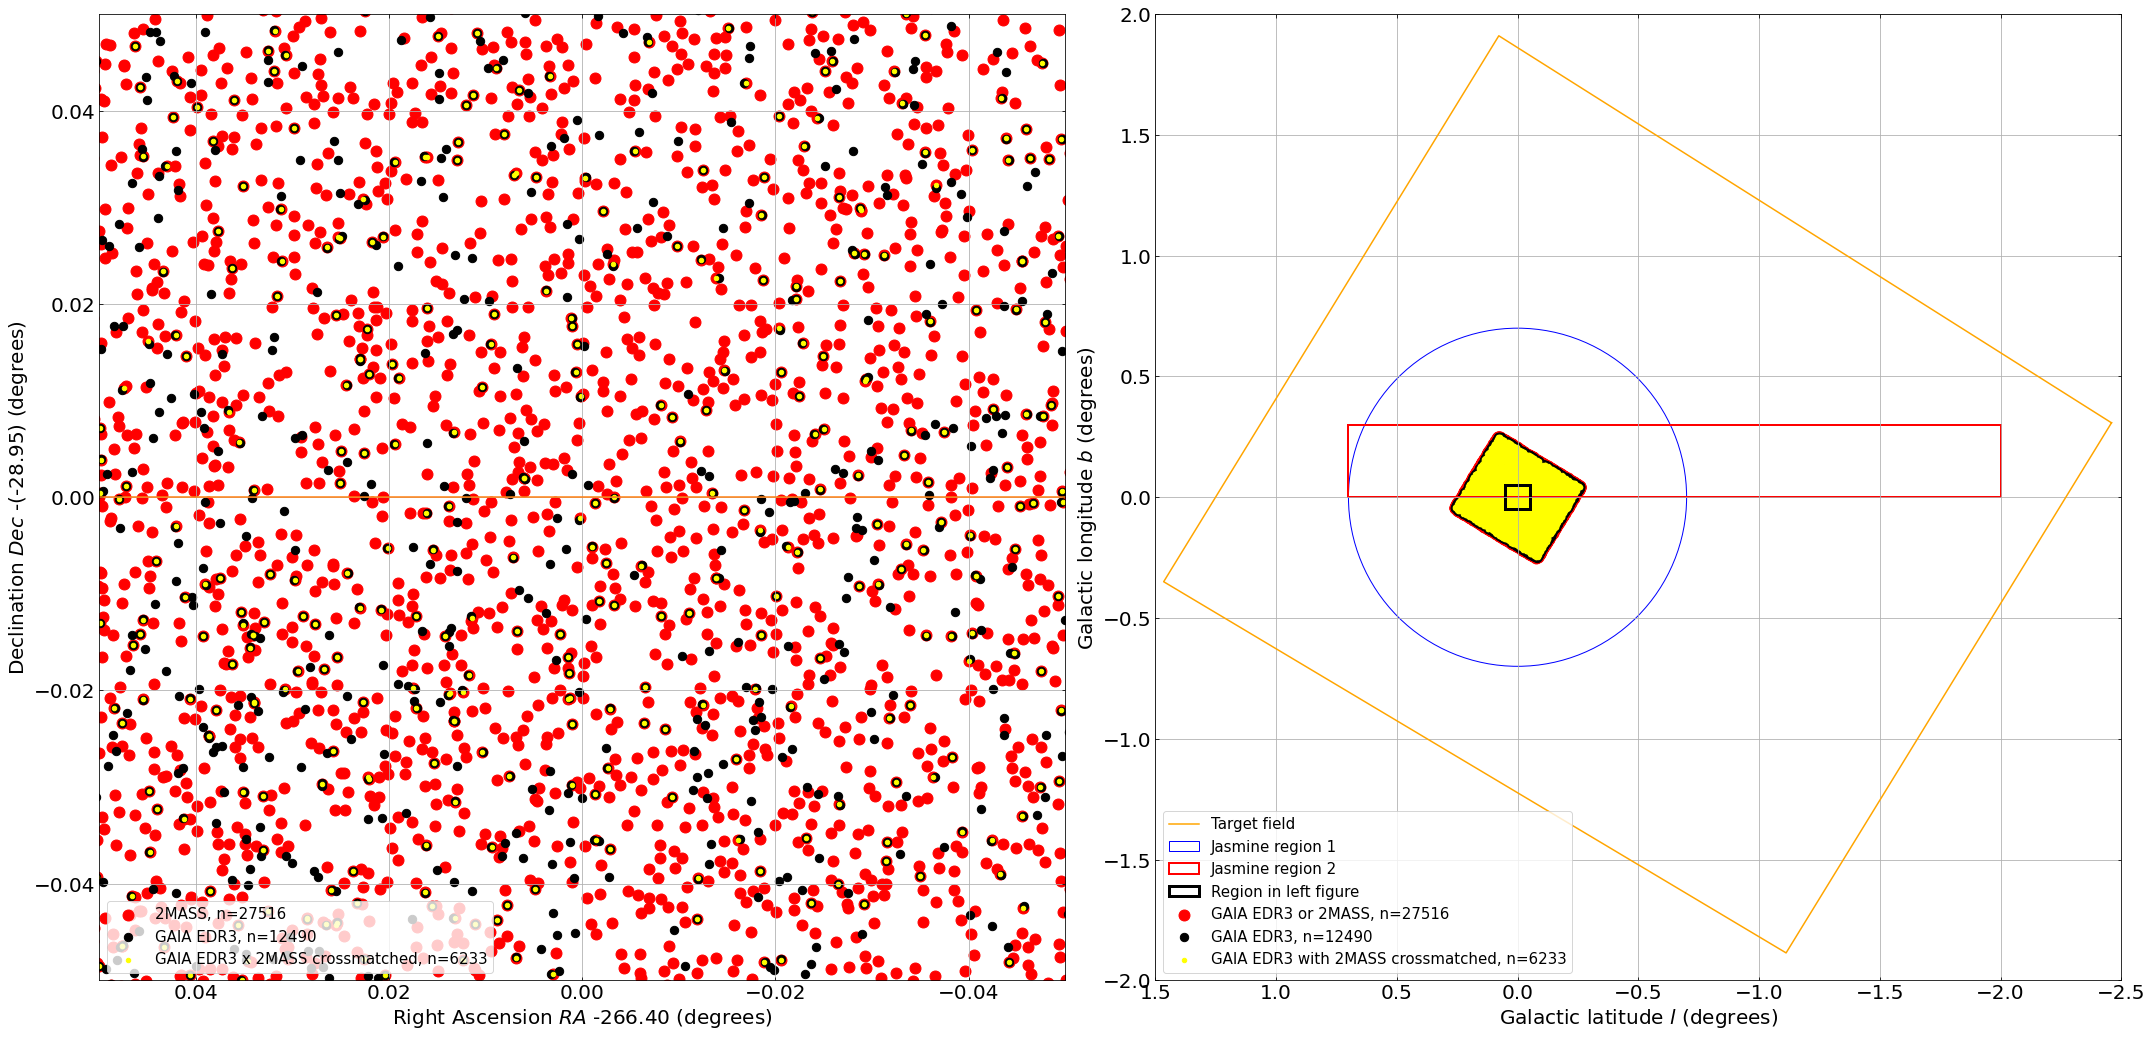

In [15]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(30,15))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.05
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

ax1.set_xlabel("Right Ascension $RA$ -266.40 (degrees)", fontsize=20)
ax1.set_ylabel("Declination $Dec$ -(-28.95) (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_allcatalog3["_RAJ2000_2MASS"]-266.40, pd_allcatalog3["_DEJ2000_2MASS"]-(-28.95), s=120, c="red", label="2MASS, n="+str(len(pd_allcatalog3.query( '_RAJ2000_2MASS >= 200' ))))
ax1.scatter(pd_allcatalog1["_RAJ2000_basic"]-266.40, pd_allcatalog1["_DEJ2000_basic"]-(-28.95), s=70, c="black", label="GAIA EDR3, n="+str(len(pd_allcatalog1)))
ax1.scatter(pd_allcatalog2["_RAJ2000_2MASS"]-266.40, pd_allcatalog2["_DEJ2000_2MASS"]-(-28.95), s=20, c="yellow", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_allcatalog2.query( '_RAJ2000_2MASS >= 200' ))))

ax2.scatter(pd_allcatalog3["_Glon_2MASS"], pd_allcatalog3["_Glat_2MASS"], s=120, c="red", label="GAIA EDR3 or 2MASS, n="+str(len(pd_allcatalog3.query( '_RAJ2000_2MASS >= 200' ))))
ax2.scatter(pd_allcatalog1["_Glon_GAIA"], pd_allcatalog1["_Glat_GAIA"], s=70, c="black", label="GAIA EDR3, n="+str(len(pd_allcatalog1)))
ax2.scatter(pd_allcatalog2["_Glon_2MASS"], pd_allcatalog2["_Glat_2MASS"], s=20, c="yellow", label="GAIA EDR3 with 2MASS crossmatched, n="+str(len(pd_allcatalog2.query( '_RAJ2000_2MASS >= 200' ))))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_radec.png")

In [16]:
def make_histogram(x, nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(15,15))
    ax = pp.axes()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.hist(pd_allcatalog3.query("index_GAIA>=0")[x], bins=nbin, range=brange, label="GAIA EDR3 stars, n="+str(len(pd_allcatalog3.query("index_GAIA>=0"))))
    if p2: pp.hist(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS n="+str(len(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0"))))
    if p3: pp.hist(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS, Hw_2MASS<15 n="+str(len(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15"))))
    if p4: pp.hist(pd_allcatalog3.query("index_2MASS>=0")[x], bins=nbin, range=brange, label="2MASS stars stars, n="+str(len(pd_allcatalog3.query("index_2MASS>0"))))
    if p5: pp.hist(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS n="+str(len(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0"))))
    if p6: pp.hist(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS, Hw_2MASS<15 n="+str(len(pd_allcatalog3.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15"))))

    if p7: pp.hist(pd_allcatalog2.query("index_GAIA>=0")[x], bins=nbin, range=brange, label="GAIA EDR3 stars, n="+str(len(pd_allcatalog2.query("index_GAIA>=0"))))
    if p8: pp.hist(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS n="+str(len(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0"))))
    if p9: pp.hist(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS, Hw_2MASS<15 n="+str(len(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15"))))
    if p10: pp.hist(pd_allcatalog2.query("index_2MASS>=0")[x], bins=nbin, range=brange, label="2MASS stars stars, n="+str(len(pd_allcatalog2.query("index_2MASS>0"))))
    if p11: pp.hist(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS n="+str(len(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0"))))
    if p12: pp.hist(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15")[x], bins=nbin, range=brange, label="GAIA EDR3 x 2MASS, Hw_2MASS<15 n="+str(len(pd_allcatalog2.query("index_GAIA>=0 and index_2MASS>=0 and Hw_2MASS<15"))))
    
    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel("Number of stars", fontsize=20)
    pp.show()
    fig.savefig("histgram.png")

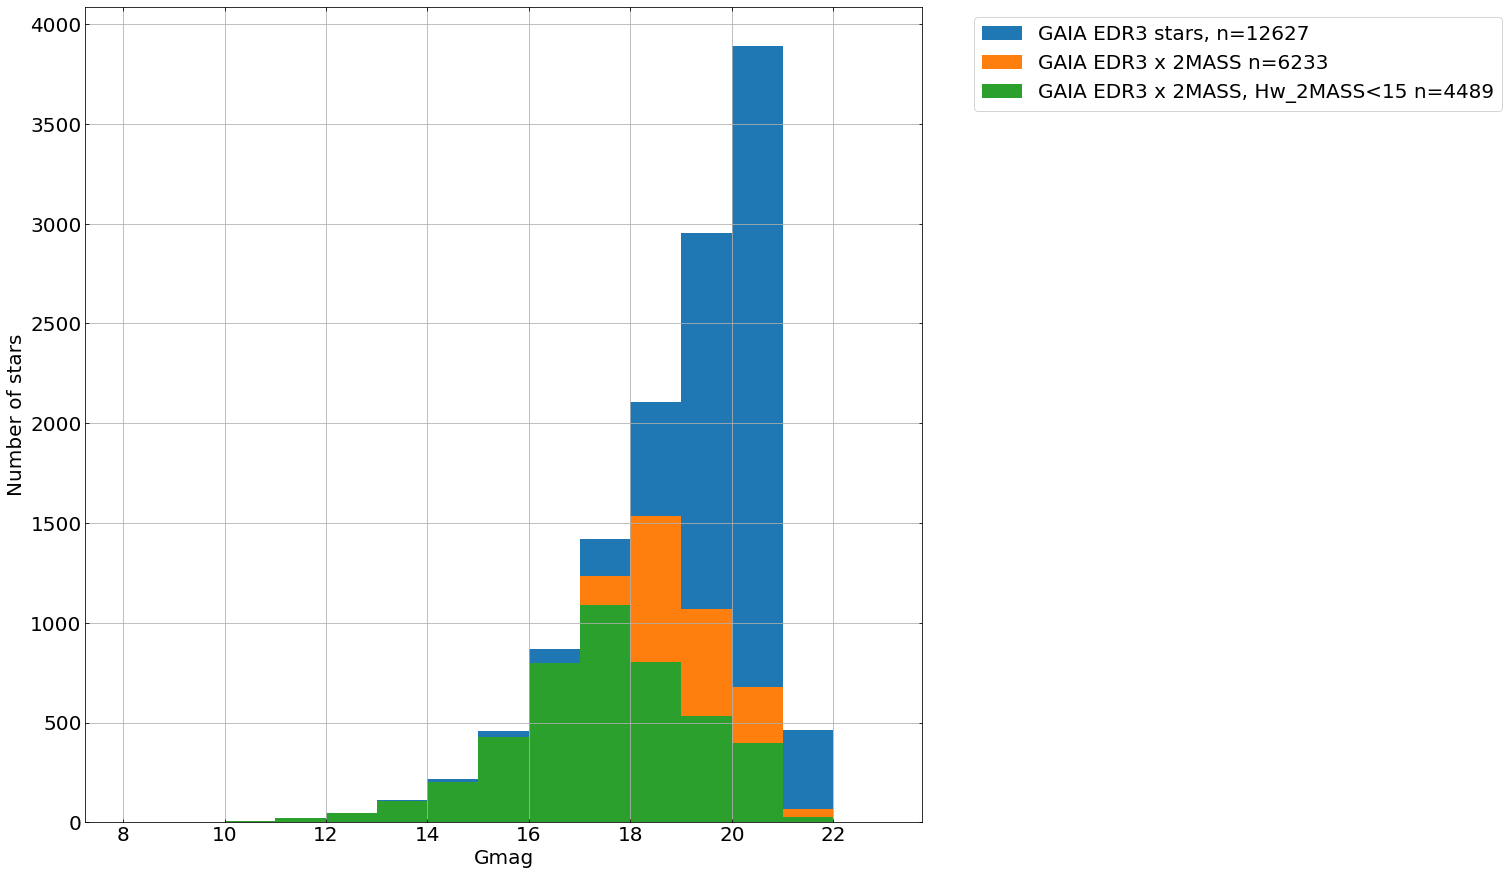

In [17]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = True   # Target stars in a whole region
p4 = False   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = False   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = False   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = False   # stars with parallax = 10-100 in a small region
nbin = 15
brange = (8, 23)
make_histogram("Gmag", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

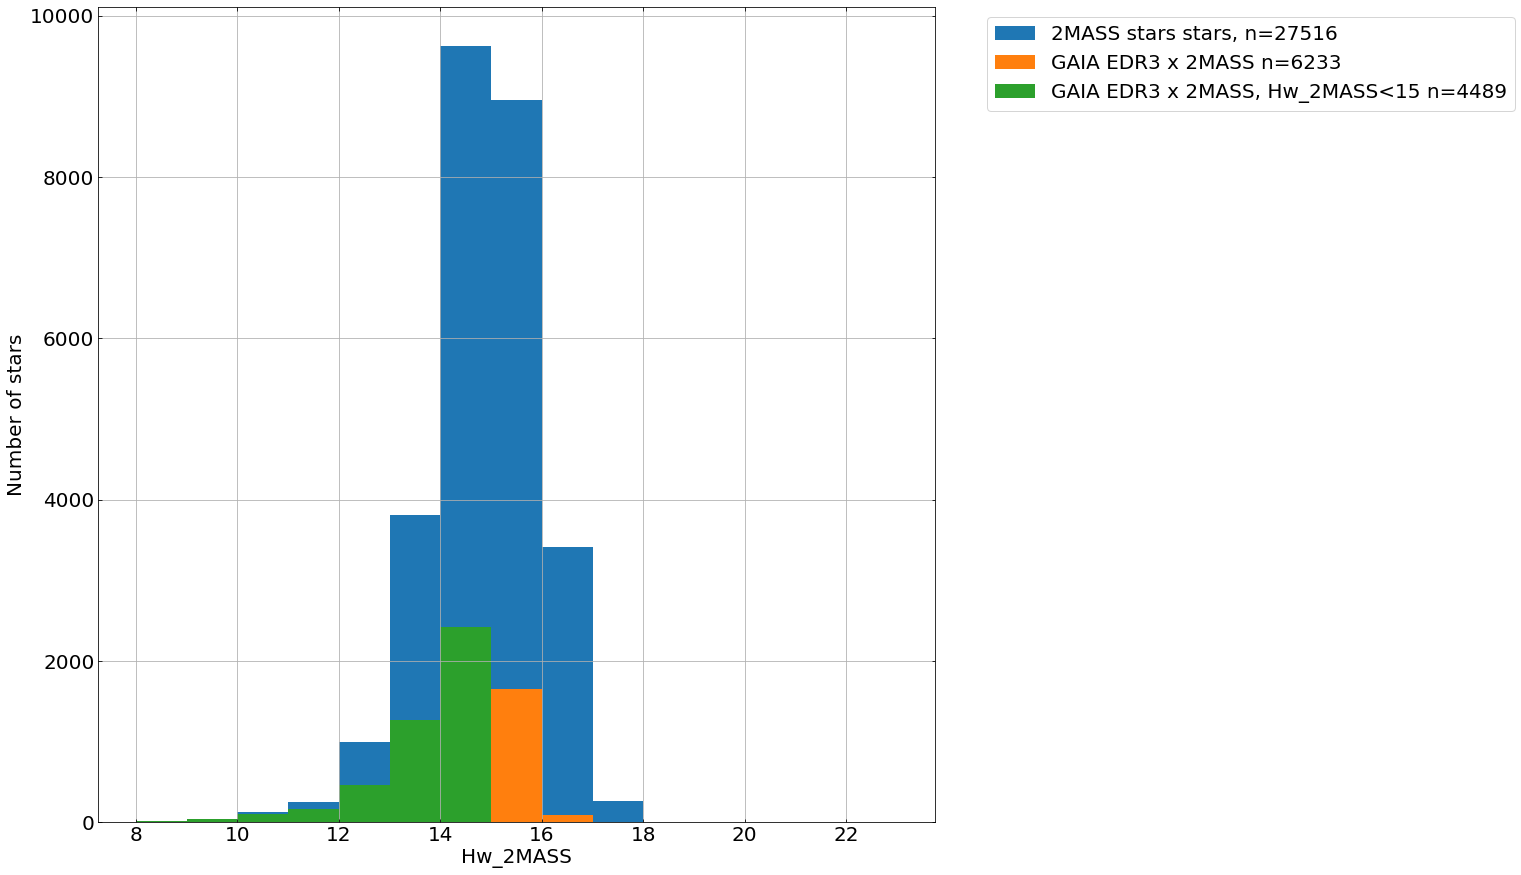

In [18]:
p1 = False   # ALL stars
p2 = False   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = True   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = False   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = False   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = False   # stars with parallax = 10-100 in a small region
nbin = 15
brange = (8, 23)
make_histogram("Hw_2MASS", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

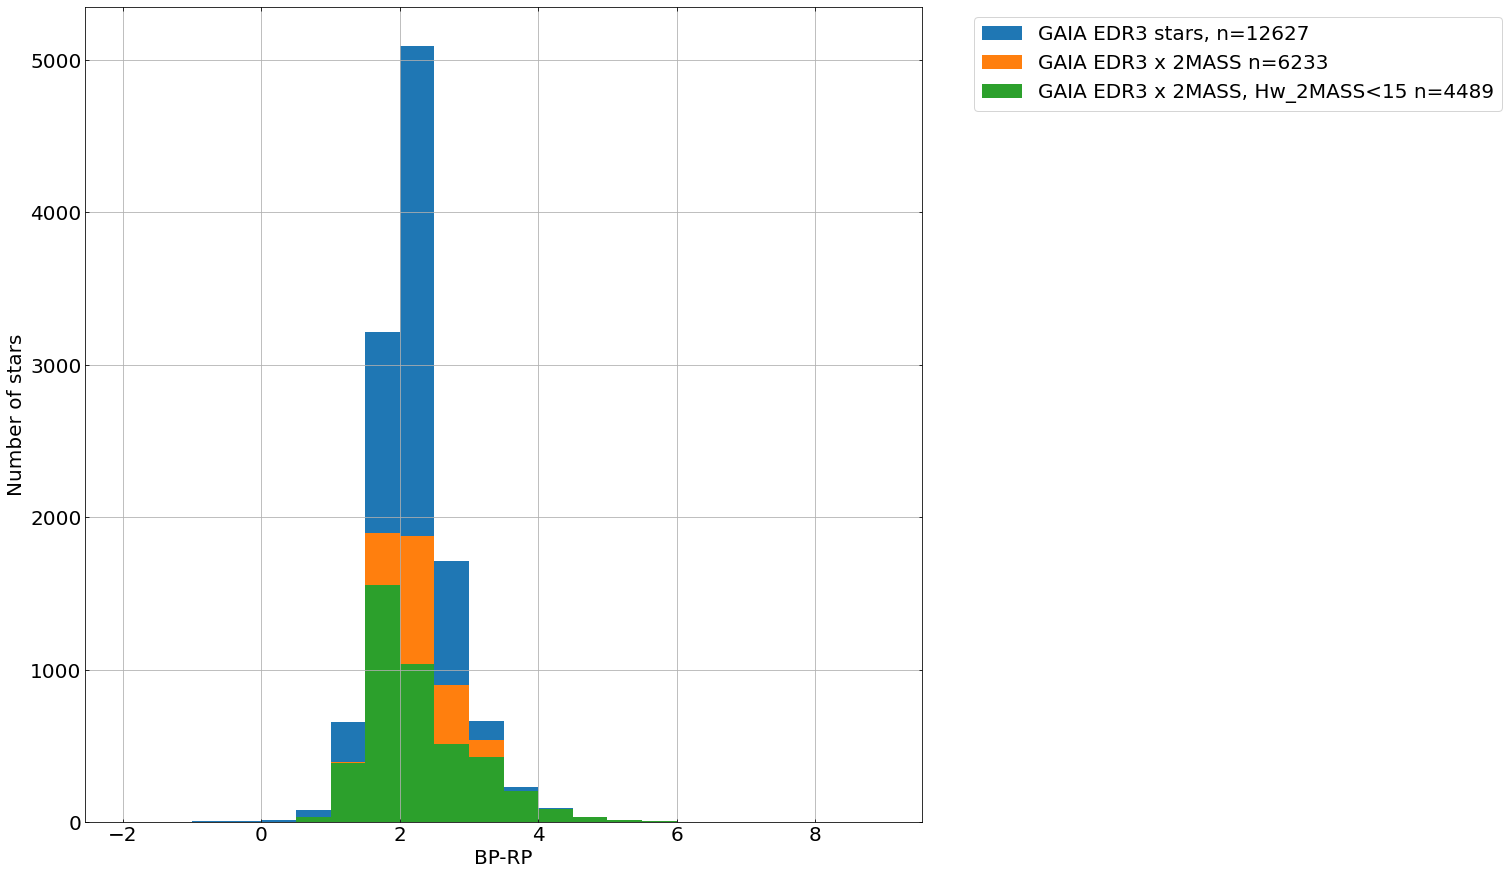

In [19]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = True   # Target stars in a whole region
p4 = False   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = False   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = False   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = False   # stars with parallax = 10-100 in a small region
nbin = 22
brange = (-2, 9)
make_histogram("BP-RP", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

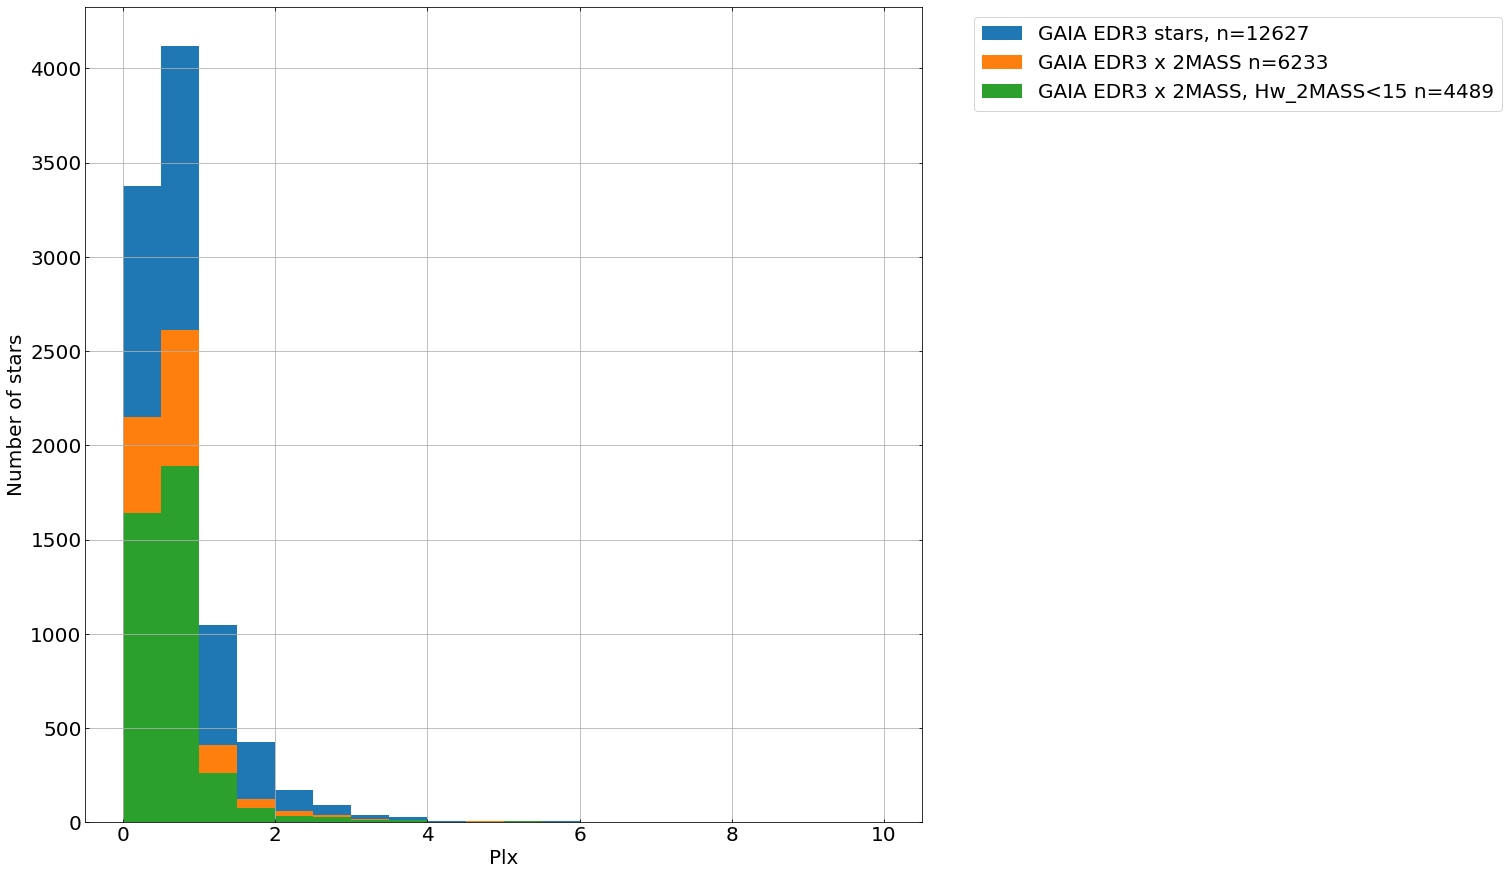

In [20]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = True   # Target stars in a whole region
p4 = False   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = False   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = False   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = False   # stars with parallax = 10-100 in a small region
nbin = 20
brange = (0, 10)
make_histogram("Plx", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)